# Electric Vehicle Population Data 2025

This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).

## Access & Use Information
- Source: https://catalog.data.gov/dataset/electric-vehicle-population-data
- Public: This dataset is intended for public access and use.
- License: Open Data Commons Open Database License (ODbL) v1.0

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('data/Electric_Vehicle_Population_Data.csv')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250659 entries, 0 to 250658
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         250659 non-null  object 
 1   County                                             250653 non-null  object 
 2   City                                               250653 non-null  object 
 3   State                                              250659 non-null  object 
 4   Postal Code                                        250653 non-null  float64
 5   Model Year                                         250659 non-null  int64  
 6   Make                                               250659 non-null  object 
 7   Model                                              250659 non-null  object 
 8   Electric Vehicle Type                              250659 non-null  object

In [76]:
print(df.isnull().sum())

VIN (1-10)                                             0
County                                                 6
City                                                   6
State                                                  0
Postal Code                                            6
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        21
Base MSRP                                             21
Legislative District                                 583
DOL Vehicle ID                                         0
Vehicle Location                                      14
Electric Utility                                       6
2020 Census Tract                                      6
dtype: int64


In [77]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E65N,Yakima,Granger,WA,98932.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,187279214,POINT (-120.1871 46.33949),PACIFICORP,5.307700e+10
1,KNDC3DLC5N,Yakima,Yakima,WA,98902.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,210098241,POINT (-120.52041 46.59751),PACIFICORP,5.307700e+10
2,5YJYGDEEXL,Snohomish,Everett,WA,98208.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,44.0,121781950,POINT (-122.18637 47.89251),PUGET SOUND ENERGY INC,5.306104e+10
3,3C3CFFGE1G,Yakima,Yakima,WA,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,14.0,180778377,POINT (-120.60199 46.59817),PACIFICORP,5.307700e+10
4,KNDCC3LD5K,Kitsap,Bremerton,WA,98312.0,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,26.0,2581225,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10


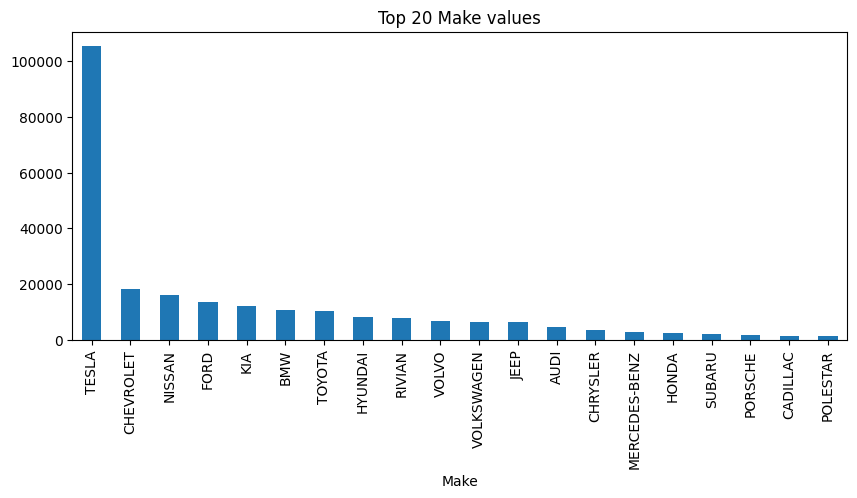

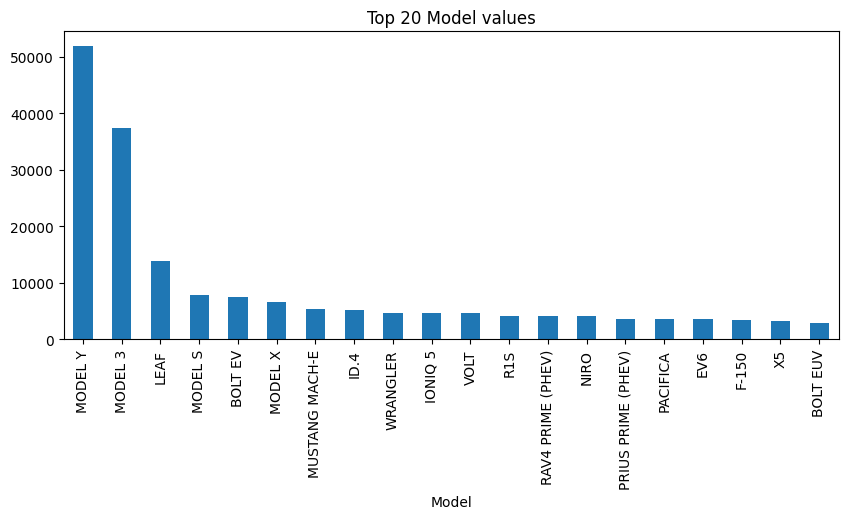

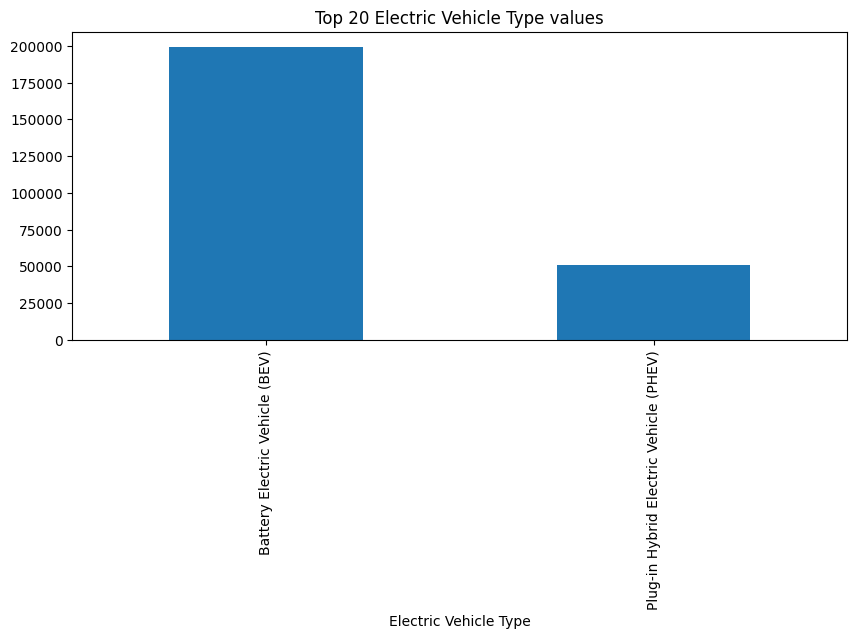

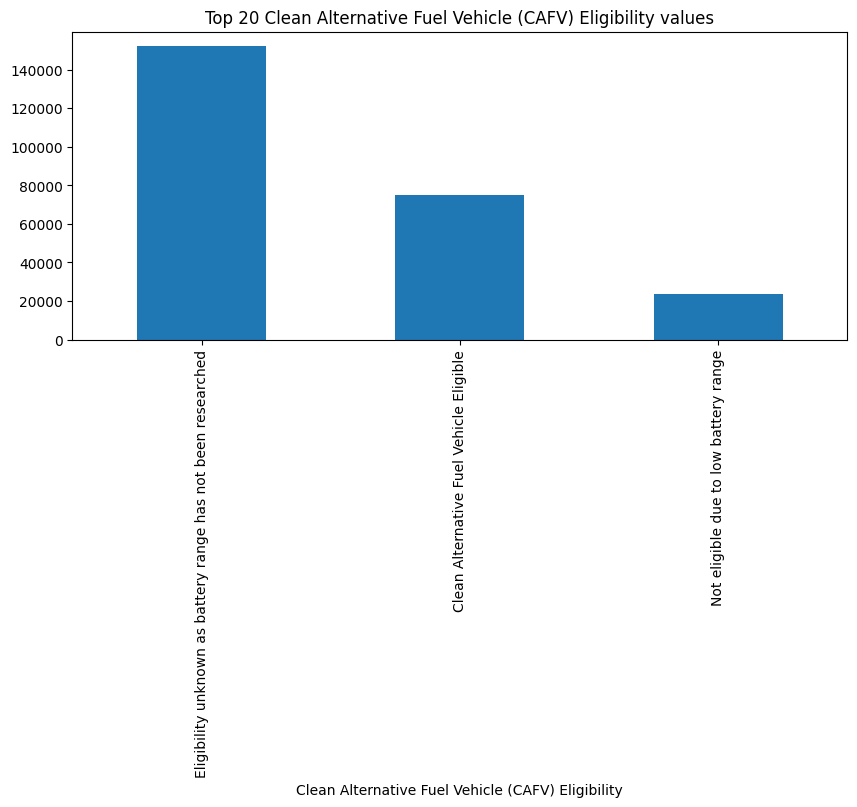

In [78]:
# Distribution of categorical variables
categorical_cols = ['Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']
for col in categorical_cols:
    plt.figure(figsize=(10,4))
    df[col].value_counts().head(20).plot(kind="bar")
    plt.title(f"Top 20 {col} values")
    plt.show()

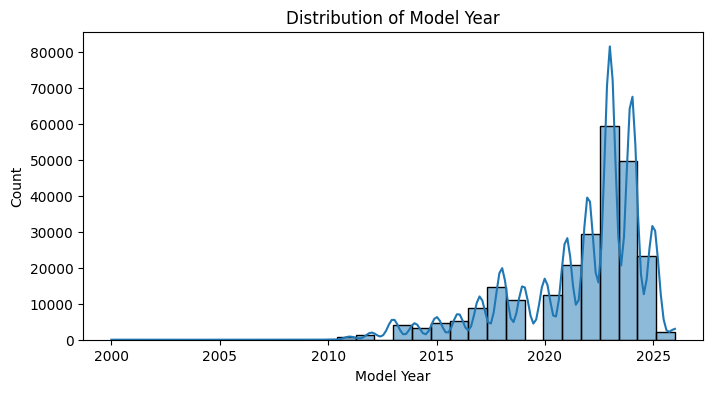

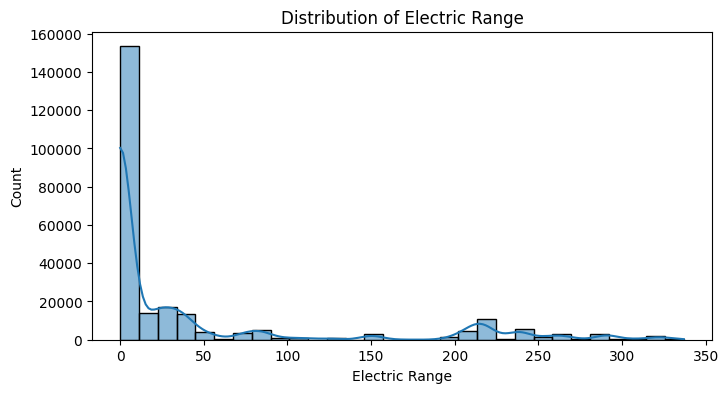

In [79]:
# Distribution of numerical variables
numerical_cols = ['Model Year', 'Electric Range']
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

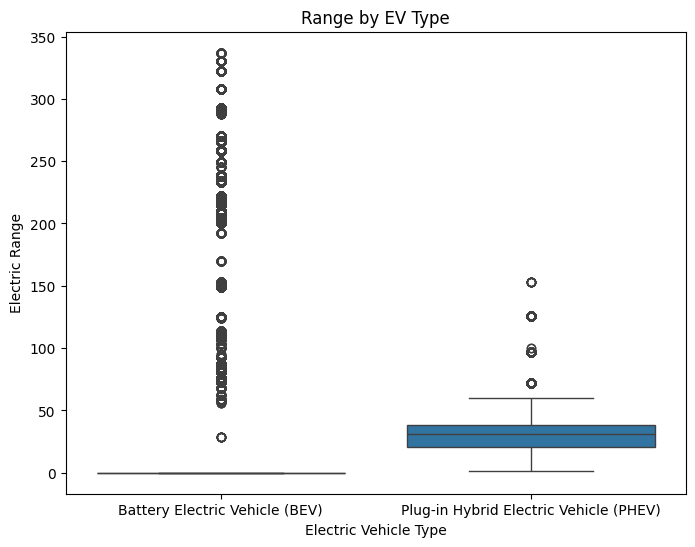

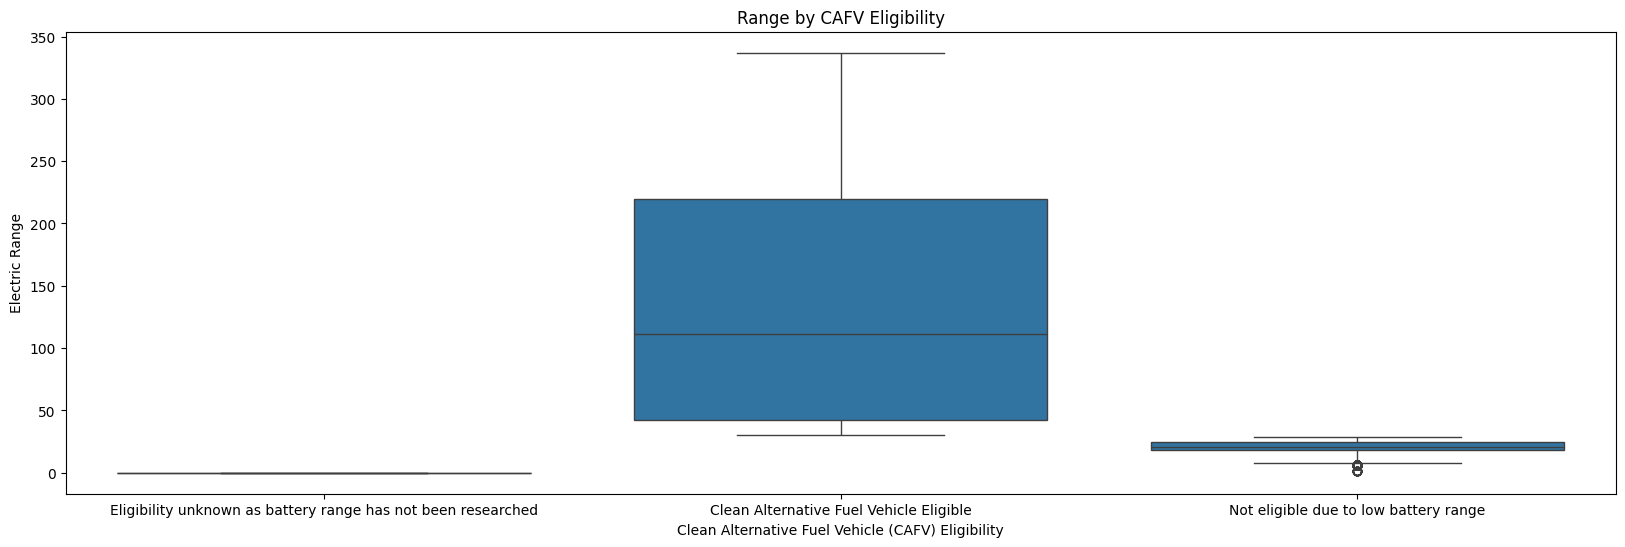

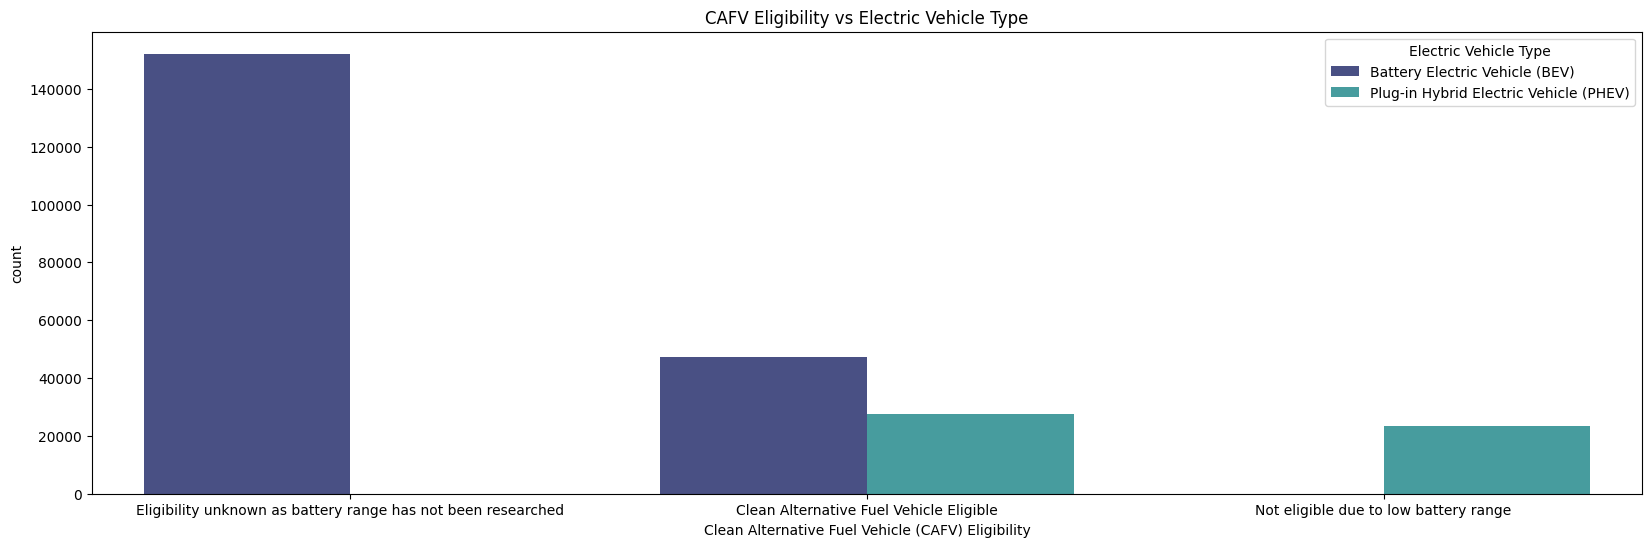

In [80]:
#Bivariate Analysis
plt.figure(figsize=(8,6))
sns.boxplot(x="Electric Vehicle Type", y="Electric Range", data=df)
plt.title("Range by EV Type")
plt.show()

plt.figure(figsize=(20,6))
sns.boxplot(x="Clean Alternative Fuel Vehicle (CAFV) Eligibility", y="Electric Range", data=df)
plt.title("Range by CAFV Eligibility")
plt.show()

plt.figure(figsize=(20,6))
sns.countplot(data=df, x="Clean Alternative Fuel Vehicle (CAFV) Eligibility", hue="Electric Vehicle Type", palette="mako")
plt.title("CAFV Eligibility vs Electric Vehicle Type")
plt.show()

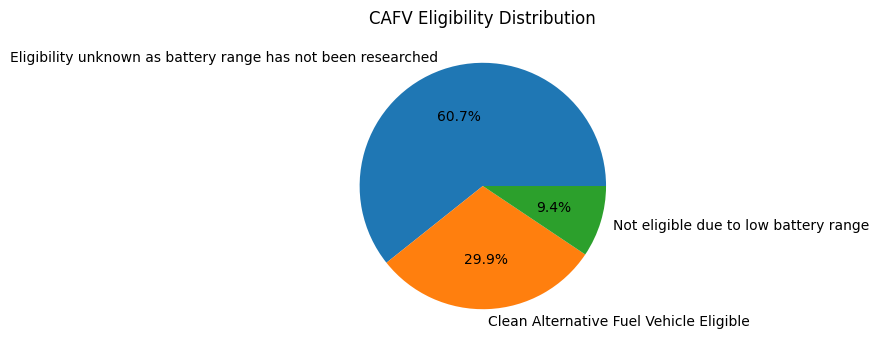

In [81]:
# Pie chart for CAFV Eligibility
plt.figure(figsize=(6,4))
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("CAFV Eligibility Distribution")
plt.ylabel("")
plt.show()

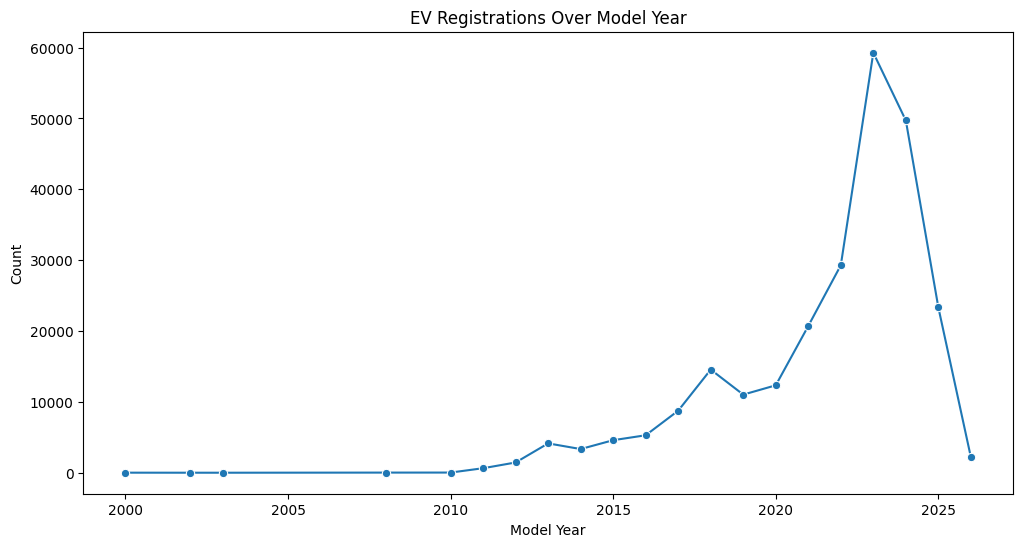

In [82]:
# Trend of EV registrations over model years
plt.figure(figsize=(12,6))
year_counts = df['Model Year'].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values, marker="o")
plt.title("EV Registrations Over Model Year")
plt.xlabel("Model Year")
plt.ylabel("Count")
plt.show()

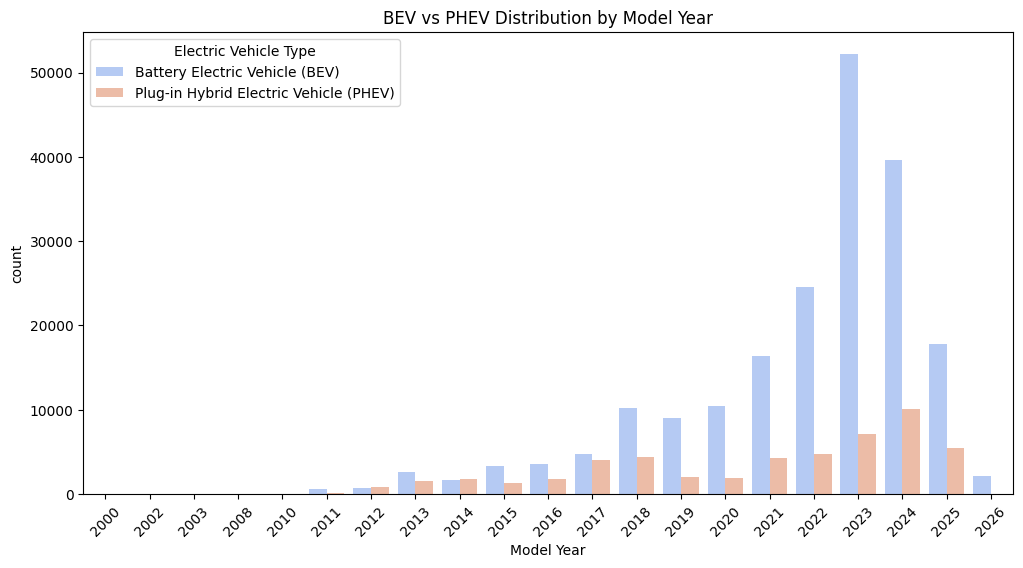

In [83]:
# BEV vs PHEV distribution by model year
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Model Year", hue="Electric Vehicle Type", palette="coolwarm")
plt.title("BEV vs PHEV Distribution by Model Year")
plt.xticks(rotation=45)
plt.show()

/var/folders/_6/cj_c80ms3854tt1gt_5k_ht80000gp/T/ipykernel_21004/1582869004.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=make_counts.index, y=make_counts.values, palette="cubehelix")


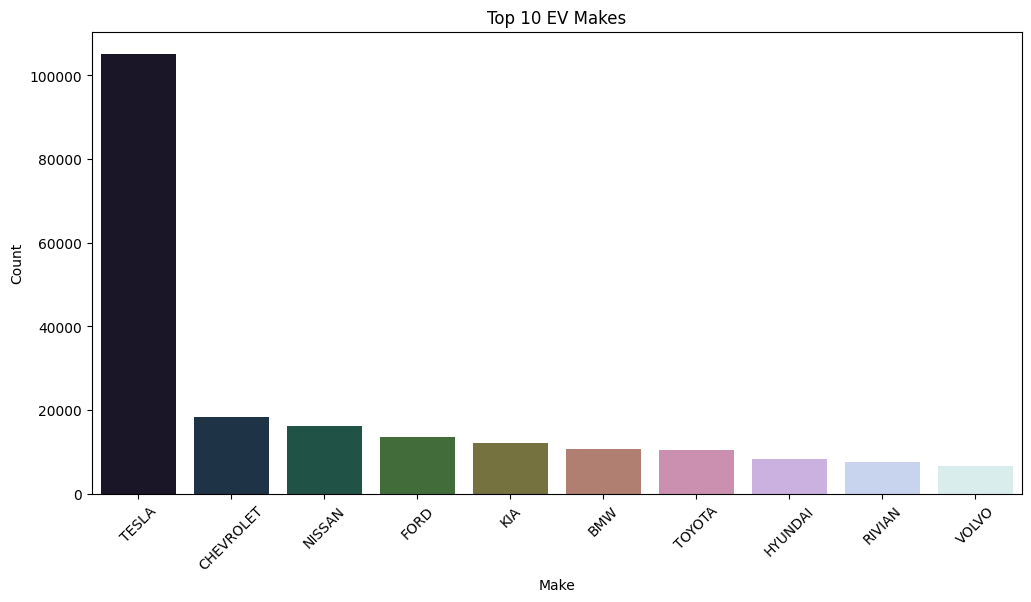

In [84]:
# Top 10 EV Makes
plt.figure(figsize=(12,6))
make_counts = df['Make'].value_counts().head(10)
sns.barplot(x=make_counts.index, y=make_counts.values, palette="cubehelix")
plt.title("Top 10 EV Makes")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

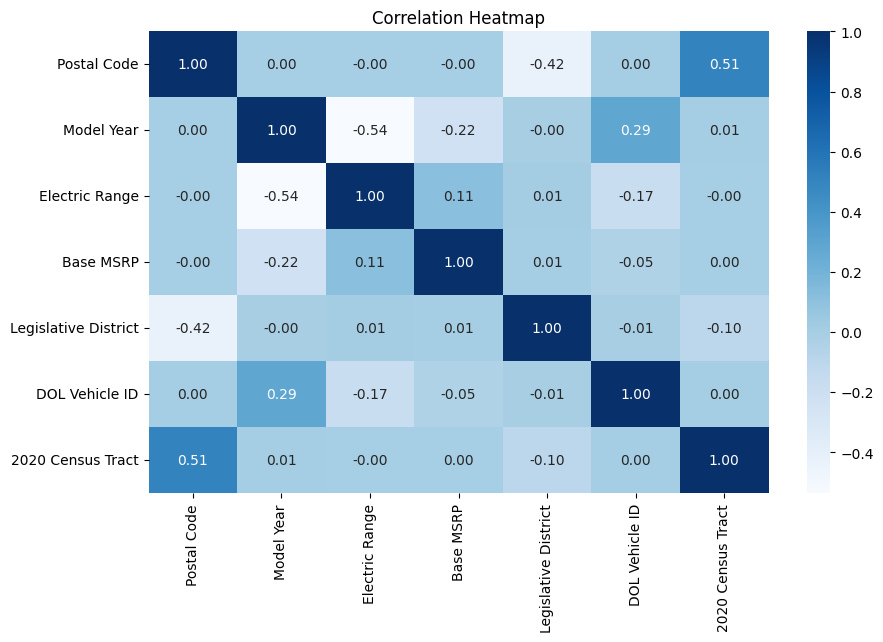

In [85]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10,6))
num_cols = df.select_dtypes(include=['int', 'float']).columns
sns.heatmap(df[num_cols].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

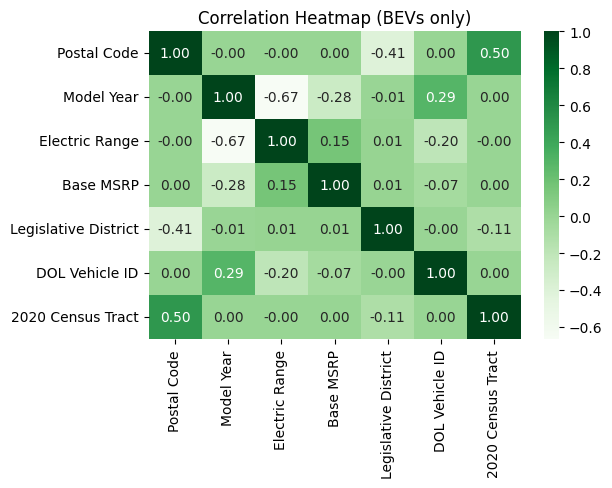

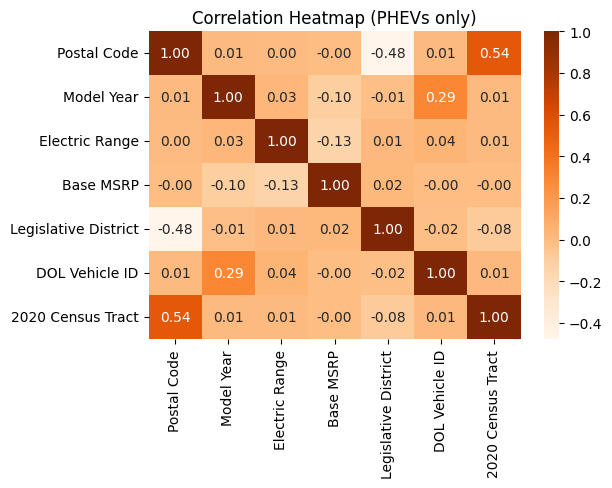

In [91]:
# Separate BEVs and PHEVs
bev_df = df[df["Electric Vehicle Type"] == "Battery Electric Vehicle (BEV)"]
phev_df = df[df["Electric Vehicle Type"] == "Plug-in Hybrid Electric Vehicle (PHEV)"]

# Correlation heatmap for BEVs
plt.figure(figsize=(6,4))
bev_num = bev_df.select_dtypes(include=['int', 'float']).columns
sns.heatmap(bev_df[bev_num].corr(), annot=True, cmap="Greens", fmt=".2f")
plt.title("Correlation Heatmap (BEVs only)")
plt.show()

# Correlation heatmap for PHEVs
plt.figure(figsize=(6,4))
phev_num = phev_df.select_dtypes(include=['int', 'float']).columns
sns.heatmap(phev_df[phev_num].corr(), annot=True, cmap="Oranges", fmt=".2f")
plt.title("Correlation Heatmap (PHEVs only)")
plt.show()

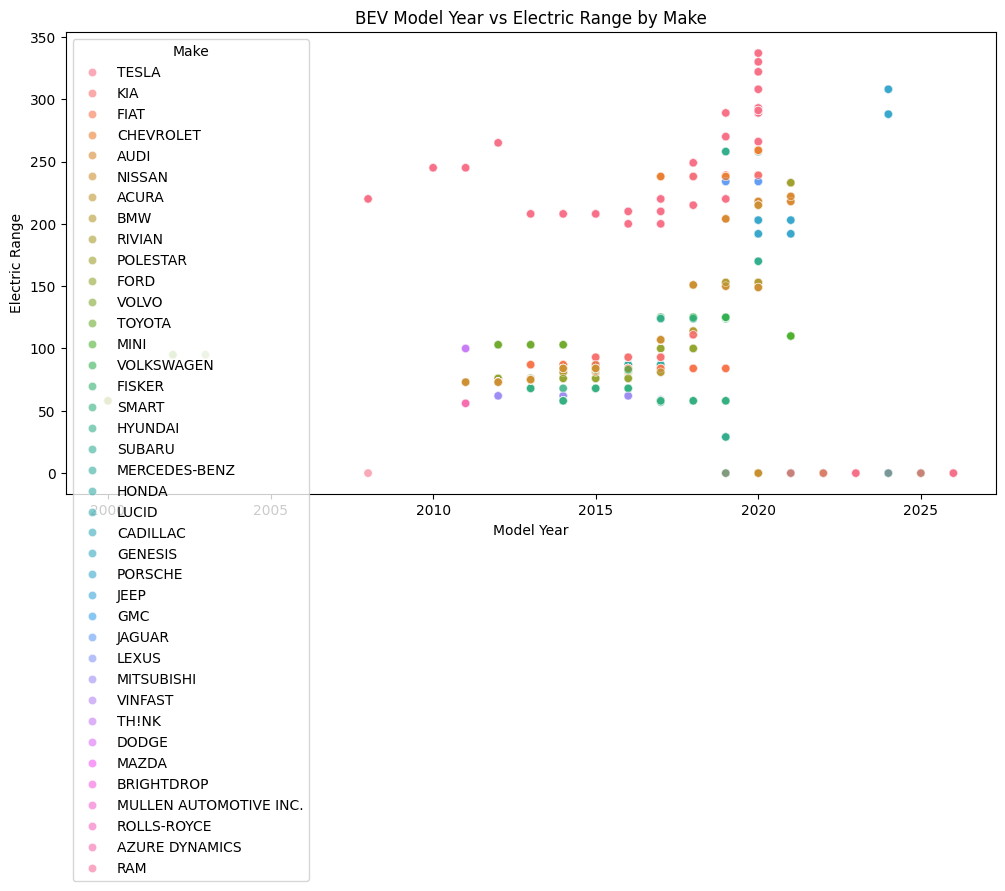

In [94]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=bev_df, x="Model Year", y="Electric Range", hue="Make", alpha=0.6)
plt.title("BEV Model Year vs Electric Range by Make")
plt.show()